# Impacto Económico Personal
Laureta es una Profesora de Ballet Licenciada en Arte Danzario que regresa a Cuba después de 10 años trabajando en el exterior, después de 6 meses ya se está adaptando a sú país natal de nuevo, pero varias cosas han cambiado, pero una de sus mayores inquietudes es el salario, y quiere saber si con su salario puede invitar a su hijo a un bar/restaurante para celebrar su cumpleaños 18.

## Bibliotecas

In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
from calcs import percent, total
from modules import add_contact, add_menu, places, boolean
from social import  facebook, instagram, whatsapp

## Salario

In [2]:
df_salary = pd.DataFrame(columns=['Grupos', 'Jornada de 40 horas (Semanales) CUP', 'Jornada de 44 horas (Semanales) CUP'])

with open('salaries.json', 'r') as file:
    data = json.load(file)

    for i in range(0, len(data)):
        items = data[i]
        df_salary.loc[i] = [data[i]['group'], data[i]['40_hours'],data[i]['44_hours']]
        
df_salary

,Grupos,Jornada de 40 horas (Semanales) CUP,Jornada de 44 horas (Semanales) CUP
0,01,1910,2100
1,02,2000,2200
2,03,2090,2300
3,04,2200,2420
4,05,2310,2540
5,06,2415,2660
6,07,2555,2810
7,08,2690,2960
8,09,2825,3110
9,10,2965,3260


El salario de Laureta es de 4375 CUP del grupo 17.

# Establecimientos

Laureta quiere saber cuántos establecimientos hay en la capital habanera.

In [35]:
json_folder = 'bars_restaurants'

json_list = []

json_list = []
list_facebook = []
list_instagram = []
list_whatsapp = []
list_web = []
list_telephone = []

list_starter = []
list_main_courses = []
list_sides = []
list_desserts = []
list_coffee = []
list_beverages = []
list_beers = []
list_cocktails = []

for file in os.listdir(json_folder):
    if file.endswith('.json'):
        file_access = os.path.join(json_folder, file)
        
        with open(file_access, 'r') as files:
            datas = json.load(files)
            json_list.append(datas)
        
        if "contact" in datas:
            contact = datas['contact']
            add_contact(contact, 'facebook', list_facebook)
            add_contact(contact, 'instagram', list_instagram)
            add_contact(contact, 'whatsapp', list_whatsapp)
            add_contact(contact, 'web', list_web)
            add_contact(contact, 'telephone', list_telephone)

        if 'menu' in datas:
            menu = datas['menu']
            add_menu(menu, 'starter', 'items', 'price', list_starter)
            add_menu(menu, 'main_courses', 'items', 'price', list_main_courses)
            add_menu(menu, 'sides', 'items', 'price', list_sides)
            add_menu(menu, 'desserts', 'items', 'price', list_desserts)
            add_menu(menu, 'coffee', 'items', 'price', list_coffee)
            add_menu(menu, 'beverages', 'items', 'price', list_beverages)
            add_menu(menu, 'beers', 'items', 'price', list_beers)
            add_menu(menu, 'cocktails', 'items', 'price', list_cocktails)

# JSON Normalize
df = pd.json_normalize(json_list)

1320770


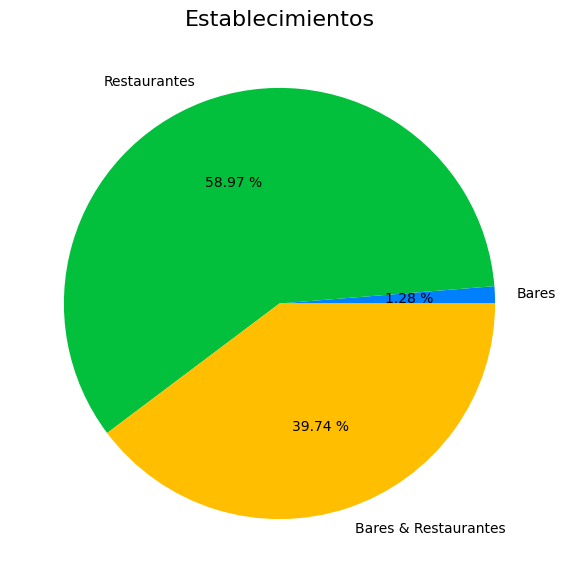

In [4]:
# Cantidades de Establecimientos
df_bar = df[df['establishment'].apply(lambda x: x == ['bar'])]
df_restaurant = df[df['establishment'].apply(lambda x: x == ['restaurante'])]
df_bar_restaurant = df[df['establishment'].apply(lambda x: x == ['bar', 'restaurante'])]

# Porcentaje de Establecimiento de cada Tipo
percent_bar = percent(df_bar, json_list)
percent_restaurant = percent(df_restaurant, json_list)
percent_bar_restaurant = percent(df_bar_restaurant, json_list)

# Gráfica Círcular
x = ['Bares', 'Restaurantes', 'Bares & Restaurantes']
y = [percent_bar, percent_restaurant, percent_bar_restaurant]

plt.figure(figsize=(7, 7))
plt.pie(y, labels=x, autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.title('Establecimientos', fontsize=('16'))
plt.show()

Pero quieren saber con más exactitud qué cantidad exacta hay de cada tipo de establecimiento en cada municipio.

### Bares

In [5]:
# Todos los establecimientos que son bares de cada municipio
df_bar_an = places(df, ['bar'], 'arroyo naranjo')
df_bar_bo = places(df, ['bar'], 'boyeros')
df_bar_ce = places(df, ['bar'], 'centro habana')
df_bar_cr = places(df, ['bar'], 'cerro')
df_bar_co = places(df, ['bar'], 'cotorro')
df_bar_do = places(df, ['bar'], 'diez de octubre')
df_bar_gu = places(df, ['bar'], 'guanabacoa')
df_bar_he = places(df, ['bar'], 'habana del este')
df_bar_hv = places(df, ['bar'], 'la habana vieja')
df_bar_li = places(df, ['bar'], 'la lisa')
df_bar_ma = places(df, ['bar'], 'marianao')
df_bar_pl = places(df, ['bar'], 'playa')
df_bar_pr = places(df, ['bar'], 'plaza de la revolución')
df_bar_re = places(df, ['bar'], 'regla')
df_bar_sm = places(df, ['bar'], 'san miguel del padrón')

Text(0.5, 0, 'Municipios')

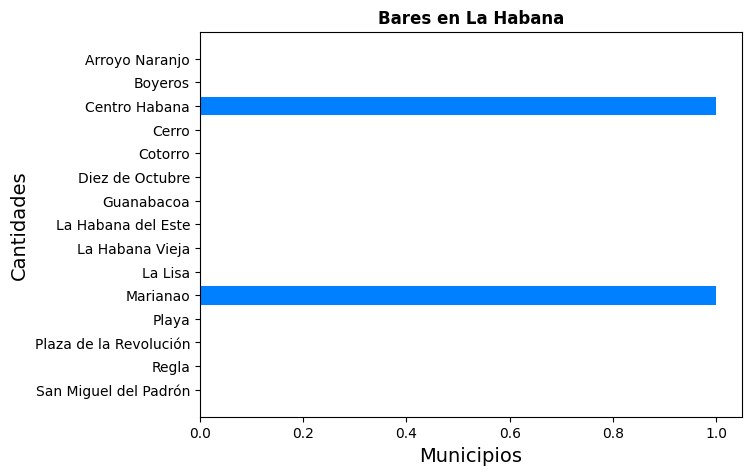

In [6]:
establishments = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
values_bar = [
    len(df_bar_an),
    len(df_bar_bo),
    len(df_bar_ce),
    len(df_bar_cr),
    len(df_bar_co),
    len(df_bar_do),
    len(df_bar_gu),
    len(df_bar_he),
    len(df_bar_hv),
    len(df_bar_li),
    len(df_bar_ma),
    len(df_bar_pl),
    len(df_bar_pr),
    len(df_bar_re),
    len(df_bar_sm),
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(establishments[::-1], values_bar[::-1], color=['#007FFF'])
plt.title('Bares en La Habana', fontweight='bold')
plt.ylabel('Cantidades', fontsize='14')
plt.xlabel('Municipios', fontsize='14')

### Restaurantes

In [7]:
# Todos los establecimientos que son restaurantes de cada municipio
df_restaurants_an = places(df, ['restaurante'], 'arroyo naranjo')
df_restaurants_bo = places(df, ['restaurante'], 'boyeros')
df_restaurants_ce = places(df, ['restaurante'], 'centro habana')
df_restaurants_cr = places(df, ['restaurante'], 'cerro')
df_restaurants_co = places(df, ['restaurante'], 'cotorro')
df_restaurants_do = places(df, ['restaurante'], 'diez de octubre')
df_restaurants_gu = places(df, ['restaurante'], 'guanabacoa')
df_restaurants_he = places(df, ['restaurante'], 'habana del este')
df_restaurants_hv = places(df, ['restaurante'], 'la habana vieja')
df_restaurants_li = places(df, ['restaurante'], 'la lisa')
df_restaurants_ma = places(df, ['restaurante'], 'marianao')
df_restaurants_pl = places(df, ['restaurante'], 'playa')
df_restaurants_pr = places(df, ['restaurante'], 'plaza de la revolución')
df_restaurants_re = places(df, ['restaurante'], 'regla')
df_restaurants_sm = places(df, ['restaurante'], 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

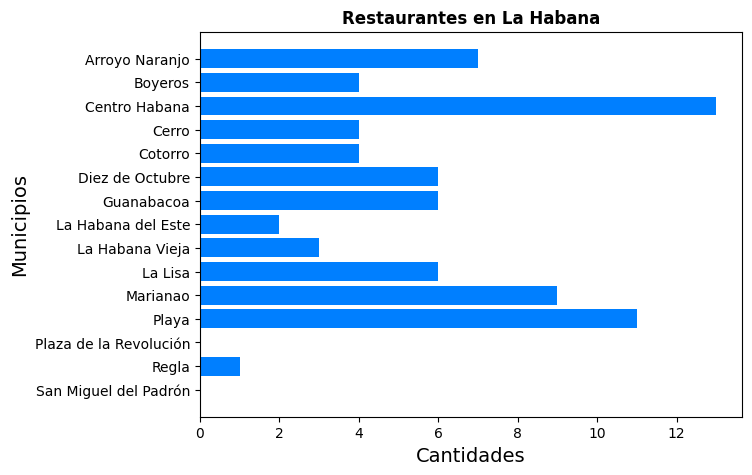

In [8]:
establishments = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
values = [
    len(df_restaurants_an),
    len(df_restaurants_bo),
    len(df_restaurants_ce),
    len(df_restaurants_cr),
    len(df_restaurants_co),
    len(df_restaurants_do),
    len(df_restaurants_gu),
    len(df_restaurants_he),
    len(df_restaurants_hv),
    len(df_restaurants_li),
    len(df_restaurants_ma),
    len(df_restaurants_pl),
    len(df_restaurants_pr),
    len(df_restaurants_re),
    len(df_restaurants_sm),
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(establishments[::-1], values[::-1], color=['#007FFF'])
plt.title('Restaurantes en La Habana', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Bares & Restaurantes

In [9]:
# Todos los establecimientos que son bares y restaurantes de cada municipio
df_bar_rest_an = places(df, ['bar' ,'restaurante'], 'arroyo naranjo')
df_bar_rest_bo = places(df, ['bar' ,'restaurante'], 'boyeros')
df_bar_rest_ce = places(df, ['bar' ,'restaurante'], 'centro habana')
df_bar_rest_cr = places(df, ['bar' ,'restaurante'], 'cerro')
df_bar_rest_co = places(df, ['bar' ,'restaurante'], 'cotorro')
df_bar_rest_do = places(df, ['bar' ,'restaurante'], 'diez de octubre')
df_bar_rest_gu = places(df, ['bar' ,'restaurante'], 'guanabacoa')
df_bar_rest_he = places(df, ['bar' ,'restaurante'], 'habana del este')
df_bar_rest_hv = places(df, ['bar' ,'restaurante'], 'la habana vieja')
df_bar_rest_li = places(df, ['bar' ,'restaurante'], 'la lisa')
df_bar_rest_ma = places(df, ['bar' ,'restaurante'], 'marianao')
df_bar_rest_pl = places(df, ['bar' ,'restaurante'], 'playa')
df_bar_rest_pr = places(df, ['bar' ,'restaurante'], 'plaza de la revolución')
df_bar_rest_re = places(df, ['bar' ,'restaurante'], 'regla')
df_bar_rest_sm = places(df, ['bar' ,'restaurante'], 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

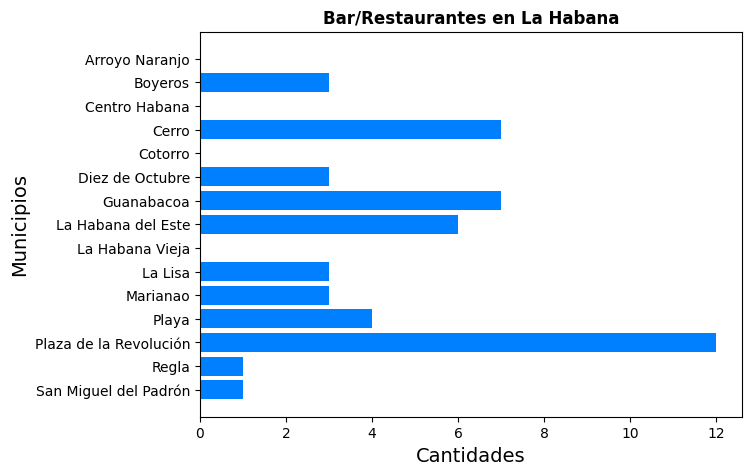

In [10]:
establishments = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
values = [
    len(df_bar_rest_an),
    len(df_bar_rest_bo),
    len(df_bar_rest_ce),
    len(df_bar_rest_cr),
    len(df_bar_rest_co),
    len(df_bar_rest_do),
    len(df_bar_rest_gu),
    len(df_bar_rest_he),
    len(df_bar_rest_hv),
    len(df_bar_rest_li),
    len(df_bar_rest_ma),
    len(df_bar_rest_pl),
    len(df_bar_rest_pr),
    len(df_bar_rest_re),
    len(df_bar_rest_sm),
    
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(establishments[::-1], values, color=['#007FFF'])
plt.title('Bar/Restaurantes en La Habana', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

## Contacto

Como Laureta recién llegó al país no recuerda donde quedan los lugares o los que recuerda ya cerraron.

Entonces quiere saber de que manera puede contactar a los establecimientos.

El hijo interviene y le dice que los métodos de contactar hoy en día son:

- Redes Sociales
- Teléfonos
- Página Web

In [11]:
percent_facebook = percent(list_facebook, json_list)
percent_instagram = percent(list_instagram, json_list)
percent_whatsapp = percent(list_whatsapp, json_list)
percent_web = percent(list_web, json_list)
percent_telephone = percent(list_telephone, json_list)

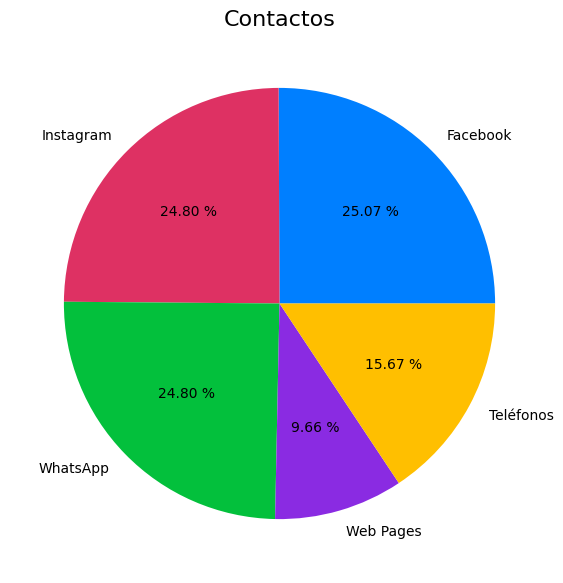

In [12]:
x = ['Facebook', 'Instagram', 'WhatsApp', 'Web Pages', 'Teléfonos']
y = [percent_facebook, percent_instagram, percent_whatsapp, percent_web, percent_telephone]

plt.figure(figsize=(7, 7))
plt.pie(y, labels=x , autopct='%0.2f %%', colors=['#007FFF', '#DE3163', '#03C03C', '#8A2BE2', '#FFBF00'])
plt.title('Contactos', fontsize=('16'))
plt.show()

Al ver lo siguientes datos algunos números no respondían porque al parecer son viejos o vencieron, muy pocos tenían páginas webs, por whatsapp solo se usa para reservar. Entonces decidieron averiguar sobre los establecimientos usando las redes sociales porque es lo que más uso tiene.

### Facebook

In [13]:
# Municipios que usan la red social facebook
df_facebook_an = facebook(df, 'arroyo naranjo')
df_facebook_bo = facebook(df, 'boyeros')
df_facebook_ce = facebook(df, 'centro habana')
df_facebook_cr = facebook(df, 'cerro')
df_facebook_co = facebook(df, 'cotorro')
df_facebook_do = facebook(df, 'diez de octubre')
df_facebook_gu = facebook(df, 'guanabacoa')
df_facebook_he = facebook(df, 'habana del este')
df_facebook_hv = facebook(df, 'la habana vieja')
df_facebook_li = facebook(df, 'la lisa')
df_facebook_ma = facebook(df, 'marianao')
df_facebook_pl = facebook(df, 'playa')
df_facebook_pr = facebook(df, 'plaza de la revolución')
df_facebook_re = facebook(df, 'regla')
df_facebook_sm = facebook(df, 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

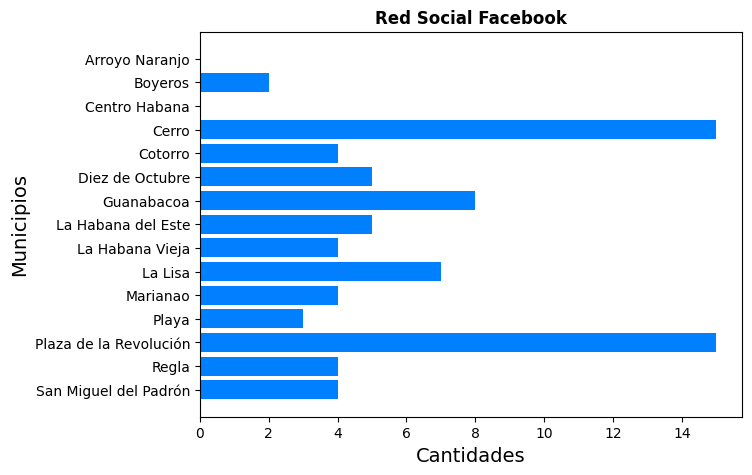

In [14]:
facebook_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
facebook_v = [
    len(df_facebook_an),
    len(df_facebook_bo),
    len(df_facebook_ce),
    len(df_facebook_cr),
    len(df_facebook_co),
    len(df_facebook_do),
    len(df_facebook_gu),
    len(df_facebook_he),
    len(df_facebook_hv),
    len(df_facebook_li),
    len(df_facebook_ma),
    len(df_facebook_pl),
    len(df_facebook_pr),
    len(df_facebook_re),
    len(df_facebook_sm)
    
]


# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(facebook_t[::-1], facebook_v, color=['#007FFF'])
plt.title('Red Social Facebook', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

In [15]:
# Municipios que usan la red social instagram
df_instagram_an = instagram(df, 'arroyo naranjo')
df_instagram_bo = instagram(df, 'boyeros')
df_instagram_ce = instagram(df, 'centro habana')
df_instagram_cr = instagram(df, 'cerro')
df_instagram_co = instagram(df, 'cotorro')
df_instagram_do = instagram(df, 'diez de octubre')
df_instagram_gu = instagram(df, 'guanabacoa')
df_instagram_he = instagram(df, 'habana del este')
df_instagram_hv = instagram(df, 'la habana vieja')
df_instagram_li = instagram(df, 'la lisa')
df_instagram_ma = instagram(df, 'marianao')
df_instagram_pl = instagram(df, 'playa')
df_instagram_pr = instagram(df, 'plaza de la revolución')
df_instagram_re = instagram(df, 'regla')
df_instagram_sm = instagram(df, 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

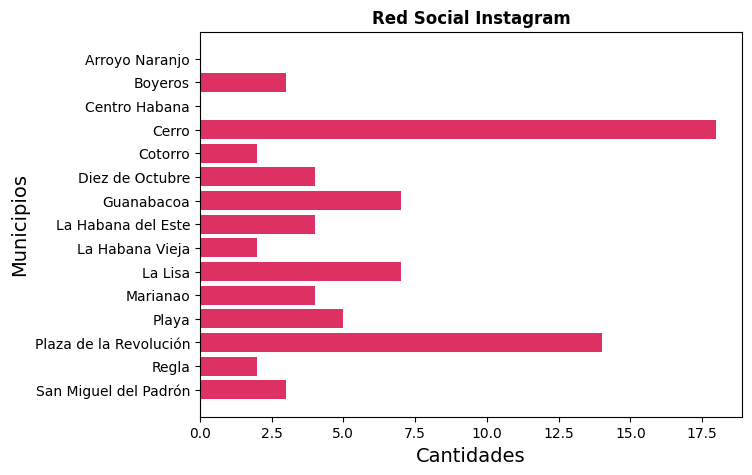

In [16]:
instagram_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
instagram_v = [
    len(df_instagram_an),
    len(df_instagram_bo),
    len(df_instagram_ce),
    len(df_instagram_cr),
    len(df_instagram_co),
    len(df_instagram_do),
    len(df_instagram_gu),
    len(df_instagram_he),
    len(df_instagram_hv),
    len(df_instagram_li),
    len(df_instagram_ma),
    len(df_instagram_pl),
    len(df_instagram_pr),
    len(df_instagram_re),
    len(df_instagram_sm)
    
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(instagram_t[::-1], instagram_v, color=['#DE3163'])
plt.title('Red Social Instagram', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### WhatsApp

In [17]:
# Municipios que usan la red social whatsapp
df_whatsapp_an = whatsapp(df, 'arroyo naranjo')
df_whatsapp_bo = whatsapp(df, 'boyeros')
df_whatsapp_ce = whatsapp(df, 'centro habana')
df_whatsapp_cr = whatsapp(df, 'cerro')
df_whatsapp_co = whatsapp(df, 'cotorro')
df_whatsapp_do = whatsapp(df, 'diez de octubre')
df_whatsapp_gu = whatsapp(df, 'guanabacoa')
df_whatsapp_he = whatsapp(df, 'habana del este')
df_whatsapp_hv = whatsapp(df, 'la habana vieja')
df_whatsapp_li = whatsapp(df, 'la lisa')
df_whatsapp_ma = whatsapp(df, 'marianao')
df_whatsapp_pl = whatsapp(df, 'playa')
df_whatsapp_pr = whatsapp(df, 'plaza de la revolución')
df_whatsapp_re = whatsapp(df, 'regla')
df_whatsapp_sm = whatsapp(df, 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

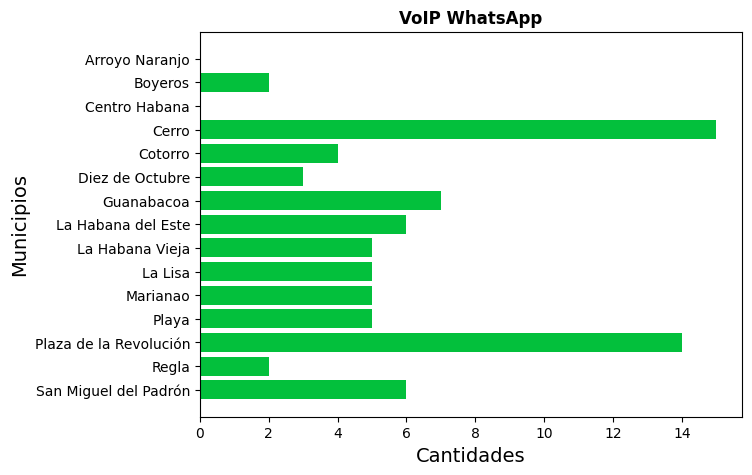

In [18]:
whatsapp_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
whatsapp_v = [
    len(df_whatsapp_an),
    len(df_whatsapp_bo),
    len(df_whatsapp_ce),
    len(df_whatsapp_cr),
    len(df_whatsapp_co),
    len(df_whatsapp_do),
    len(df_whatsapp_gu),
    len(df_whatsapp_he),
    len(df_whatsapp_hv),
    len(df_whatsapp_li),
    len(df_whatsapp_ma),
    len(df_whatsapp_pl),
    len(df_whatsapp_pr),
    len(df_whatsapp_re),
    len(df_whatsapp_sm)
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(whatsapp_t[::-1], whatsapp_v, color=['#03C03C'])
plt.title('VoIP WhatsApp', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

## Servicios

Les interesa saber que tipos de servicios ofrecen los restaurantes:

- Entrega a domicilio
- Para llevar
- Reservaciones

En especial lo que le interesa a Laureta es la entrega a domicilio porque no le gusta ir a restaurantes lejanos.

In [19]:
df_delivery = df[df['services.delivery'] == True]
df_to_take = df[df['services.to_take'] == True]
df_reserve = df[df['services.reserve'] == True]

percent_delivery = percent(df_delivery, json_list)
percent_to_take = percent(df_to_take, json_list)
percent_reserve = percent(df_reserve, json_list)

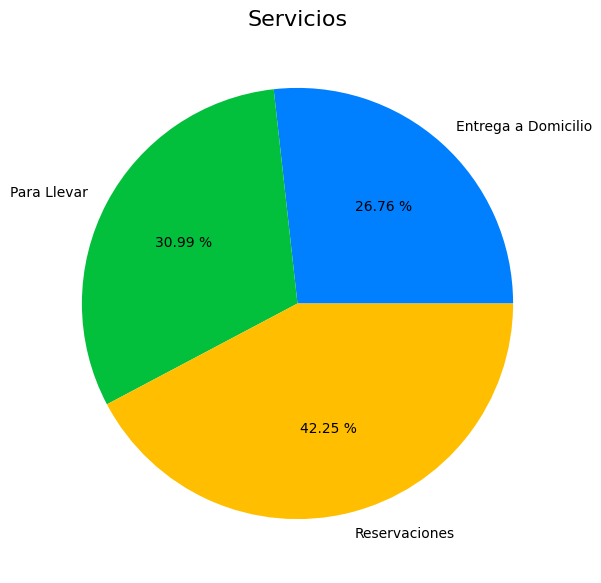

In [20]:
x = ['Entrega a Domicilio', 'Para Llevar', 'Reservaciones']
y = [percent_delivery, percent_to_take, percent_reserve]

plt.figure(figsize=(7, 7))
plt.pie(y, labels=x , autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.title('Servicios', fontsize=('16'))
plt.show()

### Entrega a Domicilio

In [21]:
# Municipios con servicio de entrega
df_delivery_an = boolean(df, 'services.delivery', 'address.town', 'arroyo naranjo')
df_delivery_bo = boolean(df, 'services.delivery', 'address.town', 'boyeros')
df_delivery_ce = boolean(df, 'services.delivery', 'address.town', 'centro habana')
df_delivery_cr = boolean(df, 'services.delivery', 'address.town', 'cerro')
df_delivery_co = boolean(df, 'services.delivery', 'address.town', 'cotorro')
df_delivery_do = boolean(df, 'services.delivery', 'address.town', 'diez de octubre')
df_delivery_gu = boolean(df, 'services.delivery', 'address.town', 'guanabacoa')
df_delivery_he = boolean(df, 'services.delivery', 'address.town', 'habana del este')
df_delivery_hv = boolean(df, 'services.delivery', 'address.town', 'la habana vieja')
df_delivery_li = boolean(df, 'services.delivery', 'address.town', 'la lisa')
df_delivery_ma = boolean(df, 'services.delivery', 'address.town', 'marianao')
df_delivery_pl = boolean(df, 'services.delivery', 'address.town', 'playa')
df_delivery_pr = boolean(df, 'services.delivery', 'address.town', 'plaza de la revolución')
df_delivery_re = boolean(df, 'services.delivery', 'address.town', 'regla')
df_delivery_sm = boolean(df, 'services.delivery', 'address.town', 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

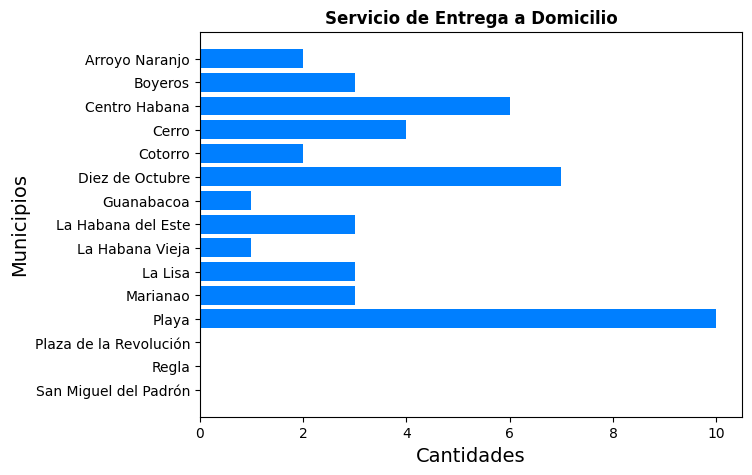

In [22]:
delivery_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
delivery_v = [
    len(df_delivery_an),
    len(df_delivery_bo),
    len(df_delivery_ce),
    len(df_delivery_cr),
    len(df_delivery_co),
    len(df_delivery_do),
    len(df_delivery_gu),
    len(df_delivery_he),
    len(df_delivery_hv),
    len(df_delivery_li),
    len(df_delivery_ma),
    len(df_delivery_pl),
    len(df_delivery_pr),
    len(df_delivery_re),
    len(df_delivery_sm)
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(delivery_t[::-1], delivery_v[::-1], color=['#007FFF'])
plt.title('Servicio de Entrega a Domicilio', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Para Llevar

In [23]:
# Municipios con servicio de recogida
df_to_take_an = boolean(df, 'services.to_take', 'address.town', 'arroyo naranjo')
df_to_take_bo = boolean(df, 'services.to_take', 'address.town', 'boyeros')
df_to_take_ce = boolean(df, 'services.to_take', 'address.town', 'centro habana')
df_to_take_cr = boolean(df, 'services.to_take', 'address.town', 'cerro')
df_to_take_co = boolean(df, 'services.to_take', 'address.town', 'cotorro')
df_to_take_do = boolean(df, 'services.to_take', 'address.town', 'diez de octubre')
df_to_take_gu = boolean(df, 'services.to_take', 'address.town', 'guanabacoa')
df_to_take_he = boolean(df, 'services.to_take', 'address.town', 'habana del este')
df_to_take_hv = boolean(df, 'services.to_take', 'address.town', 'la habana vieja')
df_to_take_li = boolean(df, 'services.to_take', 'address.town', 'la lisa')
df_to_take_ma = boolean(df, 'services.to_take', 'address.town', 'marianao')
df_to_take_pl = boolean(df, 'services.to_take', 'address.town', 'playa')
df_to_take_pr = boolean(df, 'services.to_take', 'address.town', 'plaza de la revolución')
df_to_take_re = boolean(df, 'services.to_take', 'address.town', 'regla')
df_to_take_sm = boolean(df, 'services.to_take', 'address.town', 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

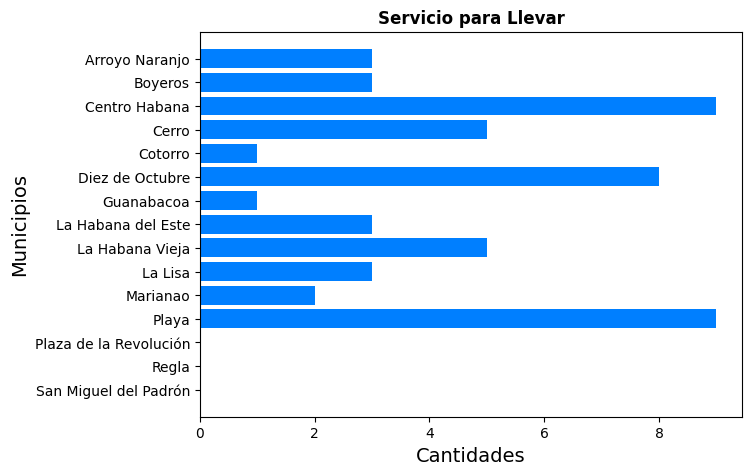

In [24]:
to_take_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
to_take_v = [
    len(df_to_take_an),
    len(df_to_take_bo),
    len(df_to_take_ce),
    len(df_to_take_cr),
    len(df_to_take_co),
    len(df_to_take_do),
    len(df_to_take_gu),
    len(df_to_take_he),
    len(df_to_take_hv),
    len(df_to_take_li),
    len(df_to_take_ma),
    len(df_to_take_pl),
    len(df_to_take_pr),
    len(df_to_take_re),
    len(df_to_take_sm)
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(to_take_t[::-1], to_take_v[::-1], color=['#007FFF'])
plt.title('Servicio para Llevar', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Reservaciones

In [25]:
# Municipios con servicio para reservar
df_reserve_an = boolean(df, 'services.reserve', 'address.town', 'arroyo naranjo')
df_reserve_bo = boolean(df, 'services.reserve', 'address.town', 'boyeros')
df_reserve_ce = boolean(df, 'services.reserve', 'address.town', 'centro habana')
df_reserve_cr = boolean(df, 'services.reserve', 'address.town', 'cerro')
df_reserve_co = boolean(df, 'services.reserve', 'address.town', 'cotorro')
df_reserve_do = boolean(df, 'services.reserve', 'address.town', 'diez de octubre')
df_reserve_gu = boolean(df, 'services.reserve', 'address.town', 'guanabacoa')
df_reserve_he = boolean(df, 'services.reserve', 'address.town', 'habana del este')
df_reserve_hv = boolean(df, 'services.reserve', 'address.town', 'la habana vieja')
df_reserve_li = boolean(df, 'services.reserve', 'address.town', 'la lisa')
df_reserve_ma = boolean(df, 'services.reserve', 'address.town', 'marianao')
df_reserve_pl = boolean(df, 'services.reserve', 'address.town', 'playa')
df_reserve_pr = boolean(df, 'services.reserve', 'address.town', 'plaza de la revolución')
df_reserve_re = boolean(df, 'services.reserve', 'address.town', 'regla')
df_reserve_sm = boolean(df, 'services.reserve', 'address.town', 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

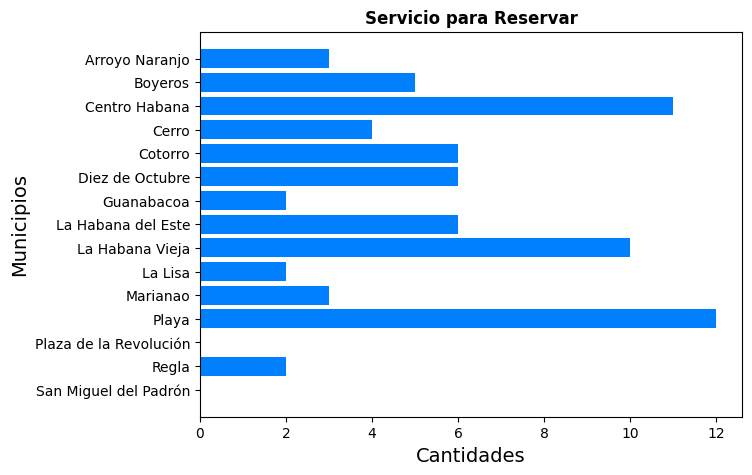

In [26]:
reserve_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
reserve_v = [
    len(df_reserve_an),
    len(df_reserve_bo),
    len(df_reserve_ce),
    len(df_reserve_cr),
    len(df_reserve_co),
    len(df_reserve_do),
    len(df_reserve_gu),
    len(df_reserve_he),
    len(df_reserve_hv),
    len(df_reserve_li),
    len(df_reserve_ma),
    len(df_reserve_pl),
    len(df_reserve_pr),
    len(df_reserve_re),
    len(df_reserve_sm)
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(reserve_t[::-1], reserve_v[::-1], color=['#007FFF'])
plt.title('Servicio para Reservar', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

## Métodos de Pago

Le interesa saber que métodos de pago ofrecen porque no tiene para pagar en efectivo, y no puede sacar dinero de los cajeros automáticos porque no tienen dinero suficientes para todos y en caja solo dan billetes pequeños de 20 ó 50 CUP.

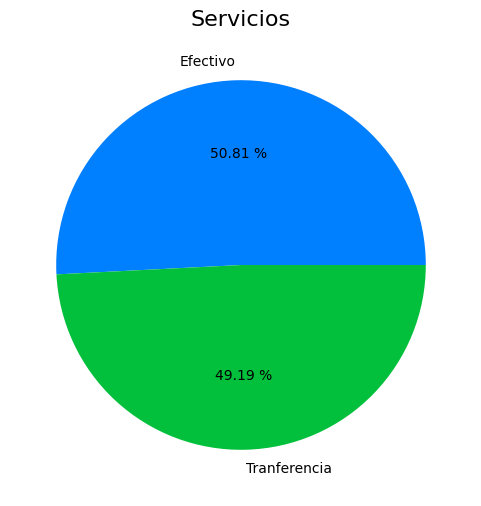

In [ ]:
df_cash = df[df['payment.cash'] == True]
df_transfer = df[df['payment.transfer'] == True]

percent_cash = percent(df_cash, json_list)
percent_transfer = percent(df_transfer, json_list)
percent_credit_card = percent(df_transfer, json_list)

x = ['Efectivo', 'Tranferencia']
y = [percent_cash, percent_transfer]

plt.figure(figsize=(6, 6))
plt.pie(y, labels=x , autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.title('Servicios', fontsize=('16'))
plt.show()

### Pago en Efectivo

In [28]:
# Municipios que aceptan pagos en efectivo
df_cash_an = boolean(df, 'payment.cash', 'address.town', 'arroyo naranjo')
df_cash_bo = boolean(df, 'payment.cash', 'address.town', 'boyeros')
df_cash_ce = boolean(df, 'payment.cash', 'address.town', 'centro habana')
df_cash_cr = boolean(df, 'payment.cash', 'address.town', 'cerro')
df_cash_co = boolean(df, 'payment.cash', 'address.town', 'cotorro')
df_cash_do = boolean(df, 'payment.cash', 'address.town', 'diez de octubre')
df_cash_gu = boolean(df, 'payment.cash', 'address.town', 'guanabacoa')
df_cash_he = boolean(df, 'payment.cash', 'address.town', 'habana del este')
df_cash_hv = boolean(df, 'payment.cash', 'address.town', 'la habana vieja')
df_cash_li = boolean(df, 'payment.cash', 'address.town', 'la lisa')
df_cash_ma = boolean(df, 'payment.cash', 'address.town', 'marianao')
df_cash_pl = boolean(df, 'payment.cash', 'address.town', 'playa')
df_cash_pr = boolean(df, 'payment.cash', 'address.town', 'plaza de la revolución')
df_cash_re = boolean(df, 'payment.cash', 'address.town', 'regla')
df_cash_sm = boolean(df, 'payment.cash', 'address.town', 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

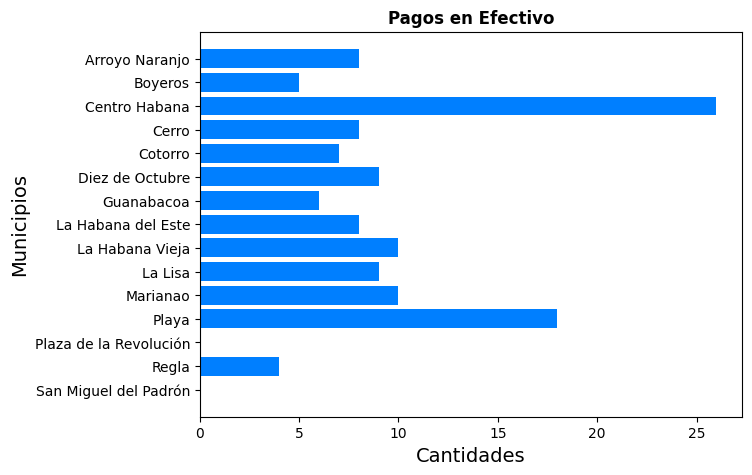

In [29]:
cash_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
cash_v = [
    len(df_cash_an),
    len(df_cash_bo),
    len(df_cash_ce),
    len(df_cash_cr),
    len(df_cash_co),
    len(df_cash_do),
    len(df_cash_gu),
    len(df_cash_he),
    len(df_cash_hv),
    len(df_cash_li),
    len(df_cash_ma),
    len(df_cash_pl),
    len(df_cash_pr),
    len(df_cash_re),
    len(df_cash_sm)
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(cash_t[::-1], cash_v[::-1], color=['#007FFF'])
plt.title('Pagos en Efectivo', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Pago por Transferencia

In [30]:
# Municipios que aceptan pagos por transferencia
df_transfer_an = boolean(df, 'payment.transfer', 'address.town', 'arroyo naranjo')
df_transfer_bo = boolean(df, 'payment.transfer', 'address.town', 'boyeros')
df_transfer_ce = boolean(df, 'payment.transfer', 'address.town', 'centro habana')
df_transfer_cr = boolean(df, 'payment.transfer', 'address.town', 'cerro')
df_transfer_co = boolean(df, 'payment.transfer', 'address.town', 'cotorro')
df_transfer_do = boolean(df, 'payment.transfer', 'address.town', 'diez de octubre')
df_transfer_gu = boolean(df, 'payment.transfer', 'address.town', 'guanabacoa')
df_transfer_he = boolean(df, 'payment.transfer', 'address.town', 'habana del este')
df_transfer_hv = boolean(df, 'payment.transfer', 'address.town', 'la habana vieja')
df_transfer_li = boolean(df, 'payment.transfer', 'address.town', 'la lisa')
df_transfer_ma = boolean(df, 'payment.transfer', 'address.town', 'marianao')
df_transfer_pl = boolean(df, 'payment.transfer', 'address.town', 'playa')
df_transfer_pr = boolean(df, 'payment.transfer', 'address.town', 'plaza de la revolución')
df_transfer_re = boolean(df, 'payment.transfer', 'address.town', 'regla')
df_transfer_sm = boolean(df, 'payment.transfer', 'address.town', 'san miguel del padrón')

Text(0, 0.5, 'Municipios')

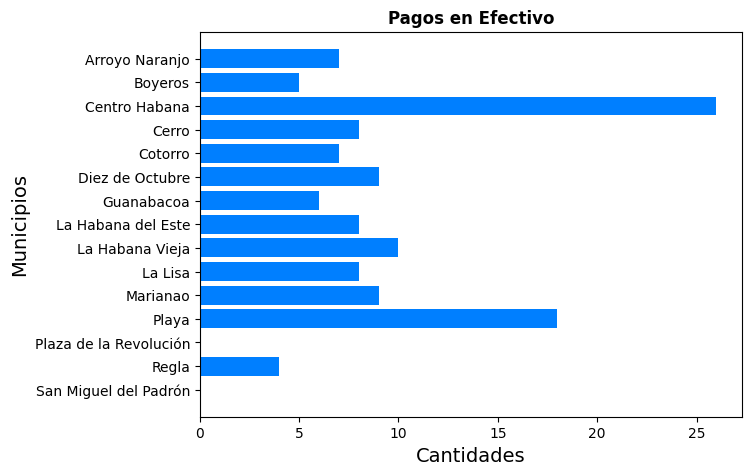

In [31]:
transfer_t = [
    'Arroyo Naranjo',
    'Boyeros',
    'Centro Habana',
    'Cerro',
    'Cotorro',
    'Diez de Octubre',
    'Guanabacoa',
    'La Habana del Este',
    'La Habana Vieja',
    'La Lisa',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla',
    'San Miguel del Padrón'
]
transfer_v = [
    len(df_transfer_an),
    len(df_transfer_bo),
    len(df_transfer_ce),
    len(df_transfer_cr),
    len(df_transfer_co),
    len(df_transfer_do),
    len(df_transfer_gu),
    len(df_transfer_he),
    len(df_transfer_hv),
    len(df_transfer_li),
    len(df_transfer_ma),
    len(df_transfer_pl),
    len(df_transfer_pr),
    len(df_transfer_re),
    len(df_transfer_sm)
]

# Gráfica de barras horizontal
plt.figure(figsize=(7, 5))
plt.barh(transfer_t[::-1], transfer_v[::-1], color=['#007FFF'])
plt.title('Pagos en Efectivo', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

## Menú

Ahora quieren saber las variades que ofrecen

In [32]:
percent_starter = percent(list_starter, json_list)
percent_main_courses = percent(list_main_courses, json_list)
percent_sides = percent(list_sides, json_list)
percent_desserts = percent(list_desserts, json_list)
percent_coffee = percent(list_coffee, json_list)
percent_beverages = percent(list_beverages, json_list)
percent_beers = percent(list_beers, json_list)
percent_cocktails = percent(list_cocktails, json_list)

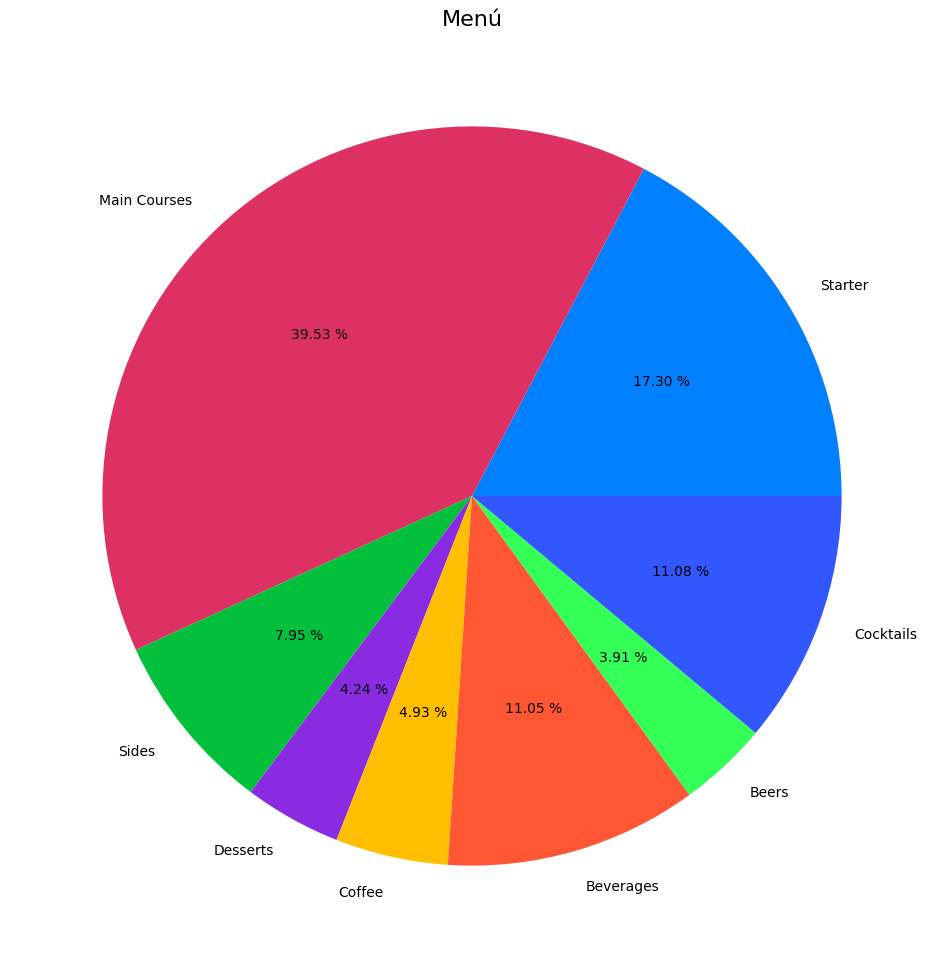

In [33]:
x = [
    'Starter', 
    'Main Courses', 
    'Sides', 
    'Desserts', 
    'Coffee', 
    'Beverages', 
    'Beers', 
    'Cocktails'
]
y = [
    percent_starter, 
    percent_main_courses, 
    percent_sides, 
    percent_desserts, 
    percent_coffee, 
    percent_beverages,
    percent_beers,
    percent_cocktails
]

plt.figure(figsize=(12, 12))
plt.pie(
    y, 
    labels=x, 
    autopct='%0.2f %%', 
    colors=['#007FFF', '#DE3163', '#03C03C', '#8A2BE2', '#FFBF00', '#FF5733', '#33FF57', '#3357FF']
)
plt.title('Menú', fontsize=('16'))
plt.show()

In [34]:
print(sum(list_main_courses))

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'